## ThinkDSP

This notebook contains code examples from Chapter 3: Non-periodic signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [78]:
# for files
from google.colab import files
uploaded = files.upload()

# Get thinkdsp.py
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

Saving 523055__cbelloso__vocales-vowels-man-woman-kid-girl.wav to 523055__cbelloso__vocales-vowels-man-woman-kid-girl (3).wav
Saving rhapblue11924.wav to rhapblue11924 (2).wav


In [79]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

### Chirp

Make a linear chirp from A3 to A5.

In [80]:
from thinkdsp import Chirp

signal = Chirp(start=220, end=880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Here's what the waveform looks like near the beginning.

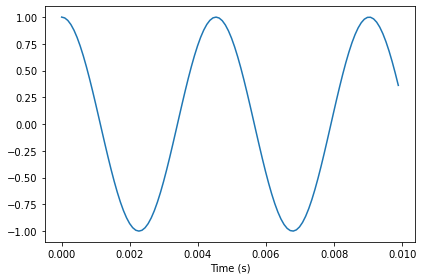

In [81]:
wave1.segment(start=0, duration=0.01).plot()
decorate(xlabel='Time (s)')

And near the end.

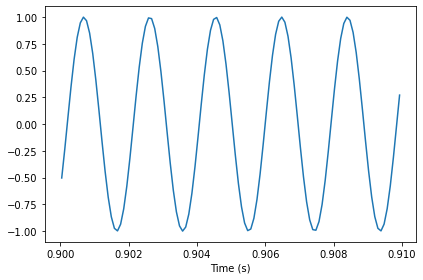

In [82]:
wave1.segment(start=0.9, duration=0.01).plot()
decorate(xlabel='Time (s)')

Here's an exponential chirp with the same frequency range and duration.

In [83]:
from thinkdsp import ExpoChirp

signal = ExpoChirp(start=220, end=880)
wave2 = signal.make_wave(duration=2)
wave2.make_audio()

## Leakage

Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [84]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)

If the duration is an integer multiple of the period, the beginning and end of the segment line up, and we get minimal leakage.

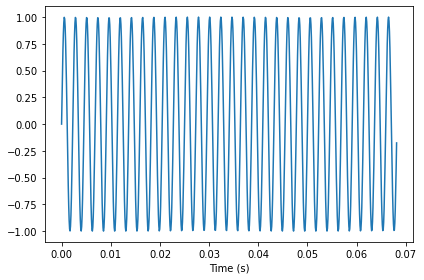

In [85]:
duration = signal.period * 30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

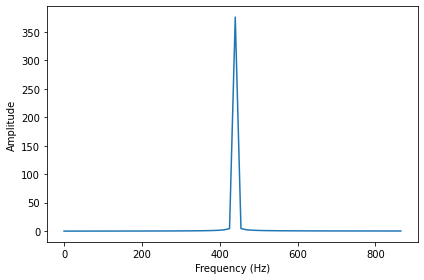

In [86]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

If the duration is not a multiple of a period, the leakage is pretty bad.

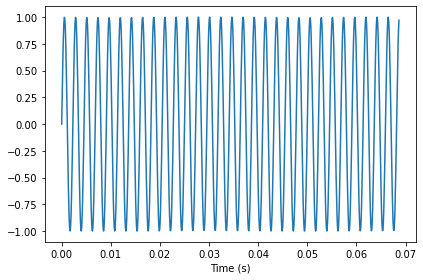

In [87]:
duration = signal.period * 30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

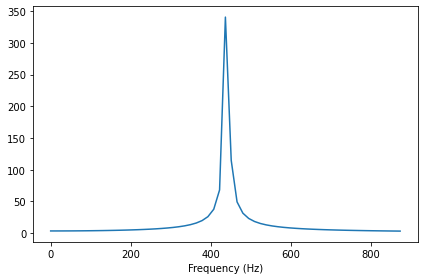

In [88]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

Windowing helps (but notice that it reduces the total energy).

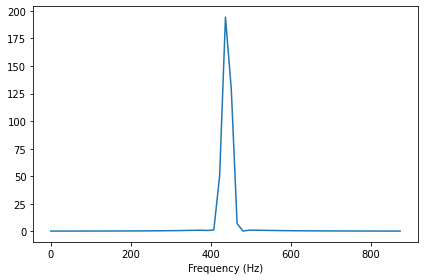

In [89]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

## Spectrogram

If you blindly compute the DFT of a non-periodic segment, you get "motion blur".

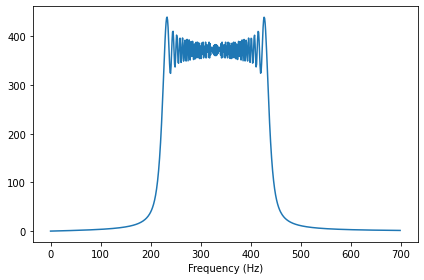

In [90]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high=700)
decorate(xlabel='Frequency (Hz)')

A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

In [91]:
def plot_spectrogram(wave, seg_length):
    """
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


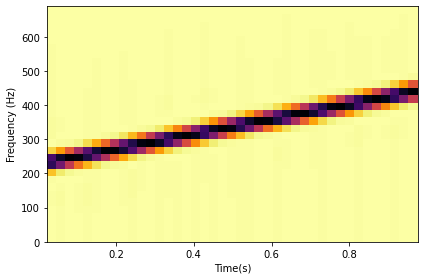

In [92]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

If you increase the segment length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


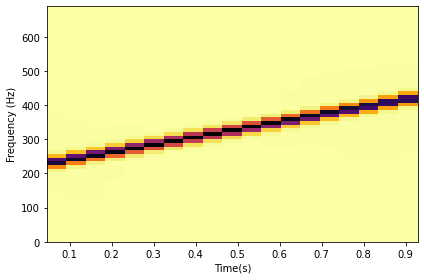

In [93]:
plot_spectrogram(wave, 1024)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


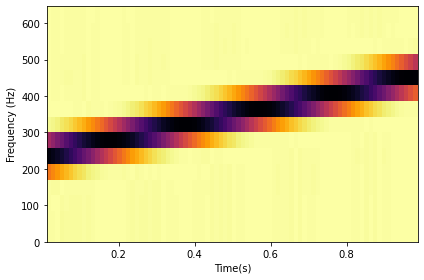

In [94]:
plot_spectrogram(wave, 256)

Time resolution (s) 0.16253968253968254
Frequency resolution (Hz) 6.15234375


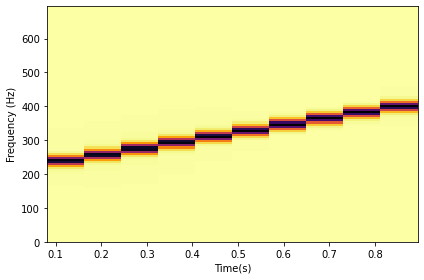

In [95]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

## Spectrum of a chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [96]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal =  Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [97]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

interactive(children=(FloatSlider(value=100.0, description='start', max=1000.0, min=100.0, step=50.0), FloatSl…

Задание 2

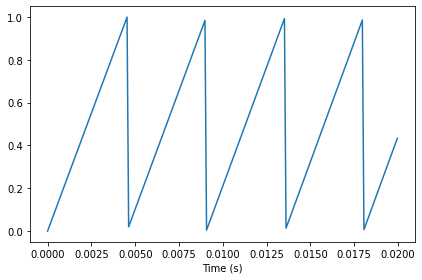

In [127]:
from thinkdsp import Signal, Sinusoid, SquareSignal, TriangleSignal
from thinkdsp import SawtoothSignal, ParabolicSignal, normalize, unbias, PI2
from thinkdsp import decorate, Chirp

import numpy as np

class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts) - 1)
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0, 0)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = self.amp * frac
        return ys
      
saw = SawtoothChirp(start=220, end=440)
wave = saw.make_wave(duration=1, framerate=11025)
wave.segment(start=0, duration=0.02).plot() 
decorate(xlabel='Time (s)')

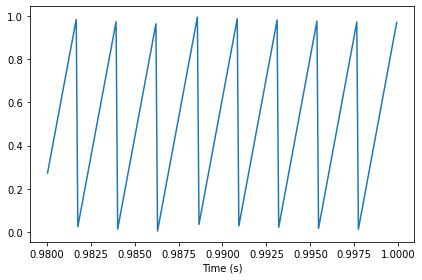

In [128]:
wave.segment(start=0.98, duration=0.02).plot()
decorate(xlabel='Time (s)')

In [100]:
wave.make_audio()

Задание 3

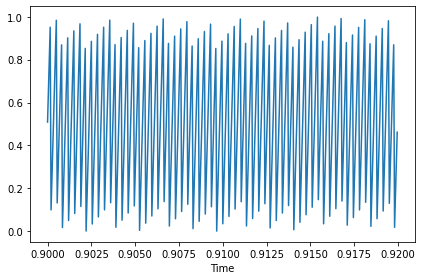

In [102]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.segment(start=0.9, duration=0.02).plot()
decorate(xlabel='Time')

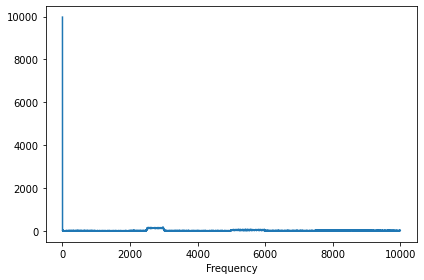

In [103]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency')

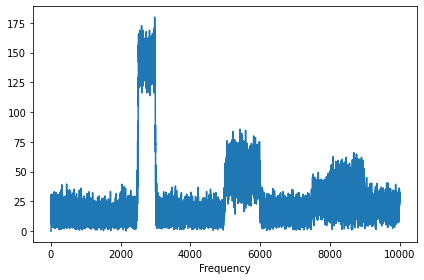

In [104]:
spectrum = wave.make_spectrum()
spectrum.high_pass(10)
spectrum.plot()
decorate(xlabel='Frequency')

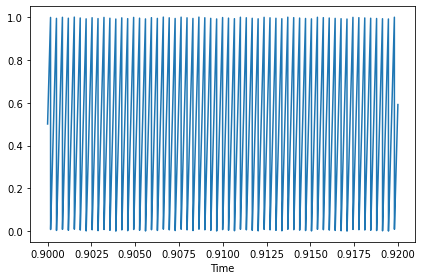

In [106]:
signal16 = SawtoothChirp(start=2500, end=3000)
wave16 = signal.make_wave(duration=1, framerate=20_000*16)
wave16.segment(start=0.9, duration=0.02).plot()
decorate(xlabel='Time')

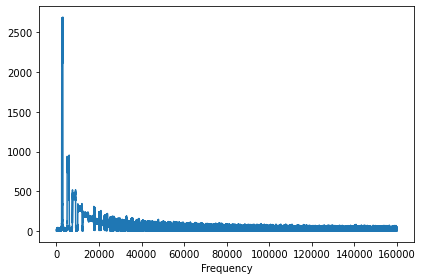

In [107]:
spectrum16 = wave16.make_spectrum()
spectrum16.high_pass(10)
spectrum16.plot()
decorate(xlabel='Frequency')

Задание 4

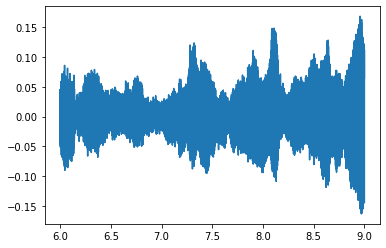

In [142]:
from thinkdsp import read_wave

wave = read_wave('rhapblue11924.wav')
segment = wave.segment(start=6.0, duration=3.0)
segment.plot()

In [143]:
segment.make_audio()

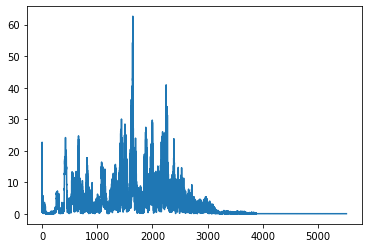

In [144]:
spectrum = segment.make_spectrum()
spectrum.plot()

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


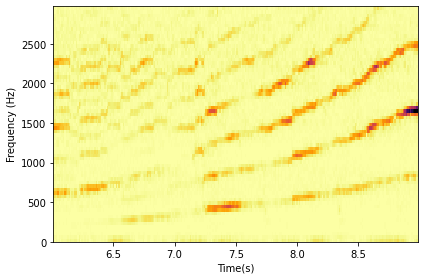

In [154]:
spectrogram = segment.make_spectrogram(256)
print('Time resolution (s)', spectrogram.time_res)
print('Frequency resolution (Hz)', spectrogram.freq_res)
spectrogram.plot(high=3000)
decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')

Задание 5

In [111]:
class MyTromboneGliss(Chirp):
    def _get_frequency(self, ts):
        S, E = self.start, self.end
        
        return E / (1 + ts * (E/S - 1))
    
    def evaluate(self, ts):
        l_C3, l_F3 = 2, 1
        
        freqs = self._get_frequency(1 - 2 * np.abs(ts[:-1] - 0.5))
        
        dts = np.diff(ts)
        dphis = PI2 * freqs * dts
        
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0, 0)
        
        ys = self.amp * np.cos(phases)
        return ys

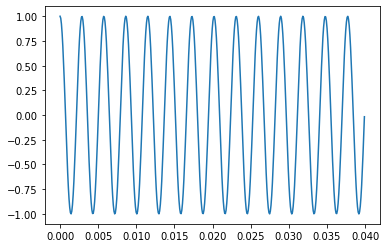

In [112]:
signal = MyTromboneGliss(start=262, end=349)
wave = signal.make_wave(duration=1, framerate=11025)
wave.segment(start=0, duration=0.04).plot()

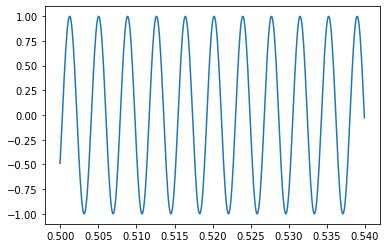

In [113]:
wave.segment(start=0.5, duration=0.04).plot()

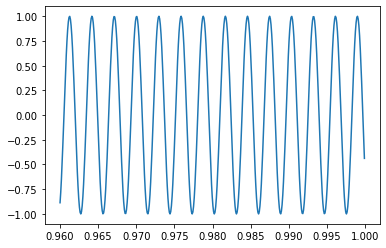

In [114]:
wave.segment(start=1-0.04, duration=0.04).plot()

In [115]:
wave.make_audio()

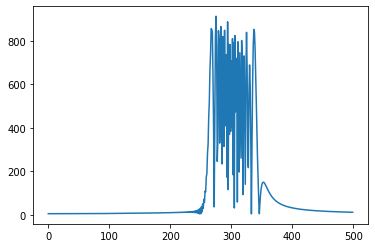

In [116]:
wave.make_spectrum().plot(high=500)

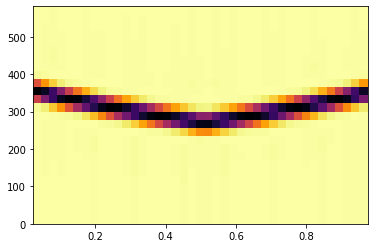

In [117]:
wave.make_spectrogram(512).plot(high=600)

Задание 6

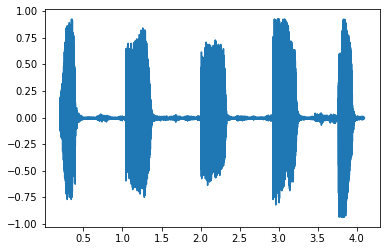

In [158]:
wave = read_wave('523055__cbelloso__vocales-vowels-man-woman-kid-girl.wav')
segment = wave.segment(start=0.2, duration=3.9)
segment.plot()

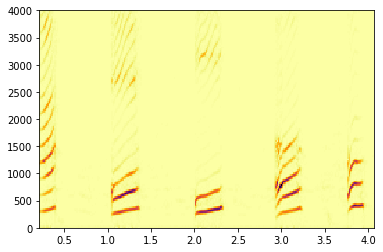

In [159]:
segment.make_spectrogram(256).plot()

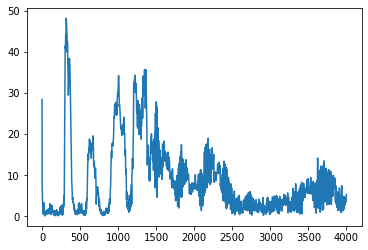

In [121]:
from matplotlib import pyplot

sounds = [
    (0.2, 0.5),
    (1.1, 0.6),
    (2.0, 0.7),
    (2.9, 0.8),
    (3.6, 0.6),
]

def test_sound(start, duration):
    it = wave.segment(start=start, duration=duration)
    it.make_spectrum().plot()
    pyplot.show()
    return it.make_audio()

test_sound(sounds[0][0], sounds[0][1])

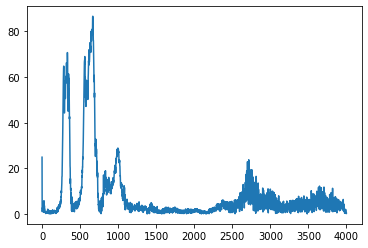

In [122]:
test_sound(sounds[1][0], sounds[1][1])

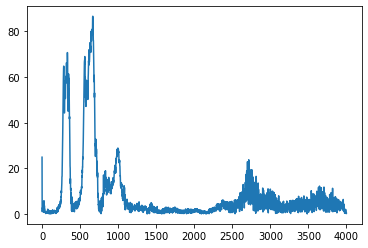

In [123]:
test_sound(sounds[1][0], sounds[1][1])